# Pytorch and Tensorflow 101 Linear Regression

<br> We first import Pytorch and TensorFlow.</br>
In the case that there are no packages please visit
<ul>
    <li> For <b> TensorFlow </b>, visit   <a href = https://www.tensorflow.org/install/>tensorflow.org/install</a>    </li>
    <li>  For <b> Pytorch </b>, visit   <a href =https://pytorch.org/get-started/locally/> pytorch.org/get-started/locally</a>    </li> </li>
</ul>
Make sure that <b>pip</b> is properly install in your environment


In [1]:
import torch  
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Define Tensors or converting from numpy arrays
In computational programing, tensor is nothing other multi-dimensional arrays. </br>
Unlike in Physics, which we need to much more care about the transformation properties.</br>
Both Pytorch and TensorFlow can change numpy type quantity to tensor quantity.


In [2]:
X = np.random.rand(4,4)
print("numpy array is given as follows ")
print(X,type(X))
X_tensorflow = tf.convert_to_tensor(X)
print("\n We can convert into tensor rank-n in ternsorflow: ")
print(X_tensorflow,type(X_tensorflow))
X_pytorch = torch.from_numpy(X)
print("\n We can convert into tensor rank-n in ternsorflow: ")

print(X_pytorch,type(X_pytorch))



numpy array is given as follows 
[[0.76542737 0.72975791 0.42738925 0.12611034]
 [0.11962532 0.51454551 0.63262513 0.86282728]
 [0.57741181 0.52120434 0.41663939 0.77576948]
 [0.95437592 0.46247148 0.06696619 0.62783337]] <class 'numpy.ndarray'>

 We can convert into tensor rank-n in ternsorflow: 
tf.Tensor(
[[0.76542737 0.72975791 0.42738925 0.12611034]
 [0.11962532 0.51454551 0.63262513 0.86282728]
 [0.57741181 0.52120434 0.41663939 0.77576948]
 [0.95437592 0.46247148 0.06696619 0.62783337]], shape=(4, 4), dtype=float64) <class 'tensorflow.python.framework.ops.EagerTensor'>

 We can convert into tensor rank-n in ternsorflow: 
tensor([[0.7654, 0.7298, 0.4274, 0.1261],
        [0.1196, 0.5145, 0.6326, 0.8628],
        [0.5774, 0.5212, 0.4166, 0.7758],
        [0.9544, 0.4625, 0.0670, 0.6278]], dtype=torch.float64) <class 'torch.Tensor'>


### Regression

In this section, I will first manually construct the ML algorithm and then I will use built-in optimization later.

1. Farward step is the generating of prediction by using a model.
2. loss is defined loss-function appropriate to model. 
3. backward propagator is done by considering gredient to find the minimum of loss and update
4. 

#### Manual (Numpy_Based Regression)
In ML model, we need roughly 3 steps: 
1) forward process, we consider y_pred = w*x 
2) loss calculation, we consider 1/N sum((y_pred_i-y_i)^2) which is usually stable under differential operators
3) backward update, update w = w - a d(loss)/dw



In [6]:
def forward_1D_regression(x):
    return w*x
def loss(y,y_predict):
    return ((y_predict-y)**2).mean()
def gredient(x,y,y_predict):
    return np.dot(2*x,(y_predict-y)).mean()

X= np.array([1,2,3,4,6,10,11,12],dtype = np.float32)
Y = 3*X + 3
X_test = np.array([5],dtype = np.float32)
w = 1

learning_rate =0.001
n_iters = 200

loss_custom = []
w_custom = []
for epoch in range(n_iters):
    y_pred = forward_1D_regression(X)
    
    l = loss(Y,y_pred)
    loss_custom.append(l)
    dw = gredient(X,Y,y_pred)
    
    w -= learning_rate * dw
    w_custom.append(w)
    if epoch % 2 == 0:
        print(f'epoch:{epoch+1}: w = {w.item():.3f}, loss = {l:.8f}')
print(f'predict before training: f(5) = {forward_1D_regression(X_test).item():.3f}')

epoch:1: w = 3.018, loss = 298.00000000
epoch:3: w = 3.335, loss = 2.83997416
epoch:5: w = 3.341, loss = 2.73292732
epoch:7: w = 3.341, loss = 2.73288894
epoch:9: w = 3.341, loss = 2.73288894
epoch:11: w = 3.341, loss = 2.73288870
epoch:13: w = 3.341, loss = 2.73288870
epoch:15: w = 3.341, loss = 2.73288870
epoch:17: w = 3.341, loss = 2.73288918
epoch:19: w = 3.341, loss = 2.73288870
epoch:21: w = 3.341, loss = 2.73288870
epoch:23: w = 3.341, loss = 2.73288870
epoch:25: w = 3.341, loss = 2.73288870
epoch:27: w = 3.341, loss = 2.73288918
epoch:29: w = 3.341, loss = 2.73288870
epoch:31: w = 3.341, loss = 2.73288870
epoch:33: w = 3.341, loss = 2.73288870
epoch:35: w = 3.341, loss = 2.73288870
epoch:37: w = 3.341, loss = 2.73288918
epoch:39: w = 3.341, loss = 2.73288870
epoch:41: w = 3.341, loss = 2.73288870
epoch:43: w = 3.341, loss = 2.73288870
epoch:45: w = 3.341, loss = 2.73288870
epoch:47: w = 3.341, loss = 2.73288918
epoch:49: w = 3.341, loss = 2.73288870
epoch:51: w = 3.341, loss = 

### Pytorch Based Regression
In Pytorch, there are super useful module for example, Regression, loss function, optimization, which might be well optimized

Firstlym let consider Linear regression by using <b>torch.nn.Linear</b>, the forward is automatically called in the class

In [15]:
import torch.nn as nn 

class Linear_Regression(nn.Module): 
    def __init__(self,input_dims,output_dims):
        super(Linear_Regression, self).__init__()  
        # remind that nn.Module has its __call__, so we include this line to access "nn.Module"'s attriute including __call__
        self.lin = nn.Linear(input_dims,output_dims)
        
    def forward(self,x):
        return self.lin(x)

# we need 1 feature 4 samples , so that we need column vector input data 4x1, [1,2,3,4] -> (4,), reshape and convert to tensor are needed.
def pytorch_columnize(z):
    return torch.from_numpy(z.reshape(len(z),1))

#### Setting data and data structures

In [18]:

X = pytorch_columnize(np.array([1,2,3,4,6,10,11,12],dtype = np.float32))
Y = pytorch_columnize(np.array(3*X + 3, dtype = np.float32))
# in the case that, we define torch.tensor with 4x1 pytorch_columnize is not needed.
X_test = torch.tensor([[5],[6],[7],[8],[9],[10]],dtype = torch.float32)
# inputs and outputs shape is consider as the second component of shape (1 in this case.)
input_dims,output_dims = X.shape[1], Y.shape[1]


In [19]:
Y

tensor([[ 6.],
        [ 9.],
        [12.],
        [15.],
        [21.],
        [33.],
        [36.],
        [39.]])

#### Model Construction and Optimization

In [34]:
model = Linear_Regression(input_dims,output_dims)
learning_rate = 0.01
n_iters = 1000
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

loss_pytorch = []
w_pytorch = []
for epoch in range(n_iters):
    y_pred = model(X)
    l = loss(Y,y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_pytorch.append(l.detach().numpy())
    [w,b] = model.parameters()
    w_pytorch.append(w[0][0].item())
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1}: w = {w[0][0].item():.3f},b = {b[0].item():.3f}, loss = {l:.8f}')
print(f'predict before training: f(5) = {model(X_test).detach()}')




epoch:1: w = 3.759,b = -0.275, loss = 953.77856445
epoch:11: w = 3.357,b = -0.124, loss = 3.00001669
epoch:21: w = 3.336,b = 0.058, loss = 2.66007376
epoch:31: w = 3.317,b = 0.230, loss = 2.35865045
epoch:41: w = 3.298,b = 0.391, loss = 2.09138489
epoch:51: w = 3.281,b = 0.544, loss = 1.85440171
epoch:61: w = 3.264,b = 0.687, loss = 1.64427185
epoch:71: w = 3.249,b = 0.822, loss = 1.45795310
epoch:81: w = 3.234,b = 0.949, loss = 1.29274666
epoch:91: w = 3.221,b = 1.069, loss = 1.14626050
epoch:101: w = 3.208,b = 1.182, loss = 1.01637352
epoch:111: w = 3.196,b = 1.288, loss = 0.90120429
epoch:121: w = 3.184,b = 1.388, loss = 0.79908550
epoch:131: w = 3.174,b = 1.482, loss = 0.70853841
epoch:141: w = 3.163,b = 1.570, loss = 0.62825096
epoch:151: w = 3.154,b = 1.654, loss = 0.55706167
epoch:161: w = 3.145,b = 1.732, loss = 0.49393809
epoch:171: w = 3.136,b = 1.806, loss = 0.43796819
epoch:181: w = 3.129,b = 1.876, loss = 0.38834077
epoch:191: w = 3.121,b = 1.942, loss = 0.34433591
epoch:2

### <b>Tensorflow</b> Based Regression 

As similar as Pytorch, the data feeding into layer need to by tensor of tensorflow.

#### Setting data and data structures

In [11]:
import numpy as np
import tensorflow as tf

# Function to reshape and convert data to tensors
def tf_tensor_columnize(z):
    return tf.convert_to_tensor(z.reshape(len(z), 1))

# Data
X = tf_tensor_columnize(np.array([1, 2, 3, 4], dtype=np.float32))
Y = tf_tensor_columnize(np.array([3, 6, 9, 12], dtype=np.float32))
X_test = tf.constant([[5],[6],[7],[8],[9],[10]],dtype = tf.float32)


#### Model Construction and Optimization

In [12]:
# Define the model
def model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1))
    return model

linear_model = model()

linear_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
    loss='MeanSquaredError')

# Custom callback to store weights and biases for plotting
class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        super(WeightTracker, self).__init__()
        self.weights_history = []  # To store weights at each epoch
        self.bias_history = []     # To store biases at each epoch

    def on_epoch_end(self, epoch, logs=None):
        # Get weights from the model (a list of arrays: [weights, bias])
        weights = self.model.get_weights()
        w, b = weights[0][0][0], weights[1][0]
        # Append weights and biases to lists
        self.weights_history.append(w)
        self.bias_history.append(b)
        if epoch % 10 == 0:
            print(f'Epoch {epoch + 1}: weight = {w:.3f}, bias = {b:.3f}')

weight_tracker = WeightTracker()
history = linear_model.fit(
    X,
    Y,
    epochs=200,
    verbose=0,
    validation_split=0,
    callbacks=[weight_tracker]  
)

w_tf = weight_tracker.weights_history
bias_tf = weight_tracker.bias_history
loss_tf = history.history['loss']
# Plotting the weight evolution
# epochs = range(1, len(weight_tracker.weights_history) + 1)
# plt.plot(epochs, weight_tracker.weights_history, label='Weight')
# plt.plot(epochs, weight_tracker.bias_history, label='Bias')
# plt.plot(history.history['loss'], label='loss')
# plt.xlabel('Epochs')
# plt.ylabel('Value')
# plt.title('Weight and Bias Evolution over Epochs')
# plt.legend()
# plt.show()


Epoch 1: weight = 1.510, bias = 0.406
Epoch 11: weight = 2.745, bias = 0.747
Epoch 21: weight = 2.768, bias = 0.683
Epoch 31: weight = 2.788, bias = 0.624
Epoch 41: weight = 2.806, bias = 0.570
Epoch 51: weight = 2.823, bias = 0.521
Epoch 61: weight = 2.838, bias = 0.476
Epoch 71: weight = 2.852, bias = 0.435
Epoch 81: weight = 2.865, bias = 0.398
Epoch 91: weight = 2.876, bias = 0.363
Epoch 101: weight = 2.887, bias = 0.332
Epoch 111: weight = 2.897, bias = 0.303
Epoch 121: weight = 2.906, bias = 0.277
Epoch 131: weight = 2.914, bias = 0.253
Epoch 141: weight = 2.921, bias = 0.231
Epoch 151: weight = 2.928, bias = 0.211
Epoch 161: weight = 2.934, bias = 0.193
Epoch 171: weight = 2.940, bias = 0.177
Epoch 181: weight = 2.945, bias = 0.161
Epoch 191: weight = 2.950, bias = 0.147


# Loss function and Weight visualization

In [419]:
loss_custom 
w_custom 
loss_pytorch
w_pytorch
w_tf
loss_tf

[45.31484603881836,
 28.726890563964844,
 18.258167266845703,
 11.650898933410645,
 7.480355262756348,
 4.847475528717041,
 3.1849277019500732,
 2.1347012519836426,
 1.4708812236785889,
 1.0509063005447388,
 0.7848148941993713,
 0.6158393621444702,
 0.508156955242157,
 0.43916136026382446,
 0.3945881128311157]

Text(0.5, 1.0, 'Loss Function Evolution over Epochs')

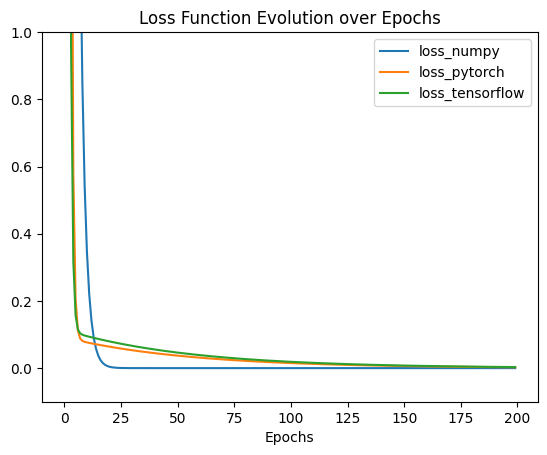

In [13]:
plt.plot(loss_custom, label='loss_numpy')
plt.plot(loss_pytorch, label='loss_pytorch')
plt.plot(loss_tf, label='loss_tensorflow')
plt.xlabel('Epochs')
plt.ylim([-0.1,1])
plt.legend()
plt.title('Loss Function Evolution over Epochs')


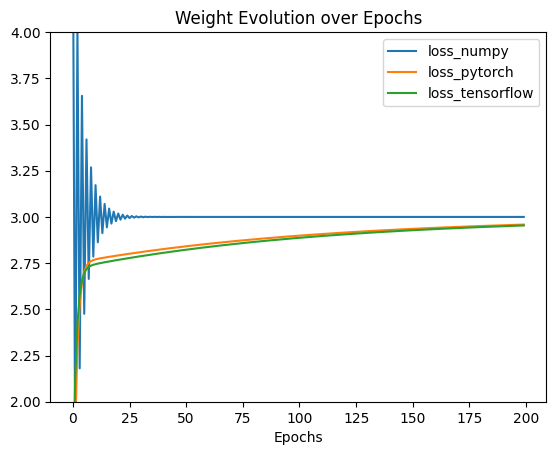

In [14]:
plt.plot(w_custom, label='loss_numpy')
plt.plot(w_pytorch, label='loss_pytorch')
plt.plot(w_tf, label='loss_tensorflow')
plt.xlabel('Epochs')
plt.ylim([2,4])
plt.title('Weight Evolution over Epochs')
plt.legend()